In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset from Kaggle on Credit Card Approvals
Link to dataset - https://www.kaggle.com/datasets/youssefaboelwafa/credit-card-approval

In [2]:
data = pd.read_csv("Data/cc_approvals.data", header=None)

cols = ['Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity',
        'YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen',
        'ZipCode','Income','ApprovalStatus']

data.columns = cols

In [3]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
data['ApprovalStatus'].unique()

array(['+', '-'], dtype=object)

In [5]:
print(len(data))

690


In [6]:
data['ApprovalStatus'].value_counts()

ApprovalStatus
-    383
+    307
Name: count, dtype: int64

### Data Cleaning


In [7]:
# Checking for Null values in the dataset

data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [8]:
for col in data.columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())

Unique values in Gender:
['b' 'a' '?']
Unique values in Age:
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '4

Below columns have unique value as '?'. How many rows are having the '?'.

In [9]:
question_list = ['Gender', 'Married', 'BankCustomer','EducationLevel','Ethnicity']

for col in question_list:
    print(f"Count of missing values in {col}:")
    print(len(data[data[col]=='?']))

Count of missing values in Gender:
12
Count of missing values in Married:
6
Count of missing values in BankCustomer:
6
Count of missing values in EducationLevel:
9
Count of missing values in Ethnicity:
9


In [10]:
# Replacing '?' with null

data_df = data.applymap(lambda x:np.nan if x == '?' else x)

data_df.isnull().sum()

/var/folders/b6/55ngryq94173gj5q44wyfpcm0000gn/T/ipykernel_59677/2739375913.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_df = data.applymap(lambda x:np.nan if x == '?' else x)


Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [12]:
## Around 5% of the data has null values, dropping null records from the dataset
len(data_df.dropna())/len(data_df)
print("Records before dropping nulls:", len(data_df))

Records before dropping nulls: 690


In [13]:
data_df2 = data_df.dropna()
print("Records after dropping null:", len(data_df2))

Records after dropping null: 653


In [14]:
def data_prep(df):
    ## Change ApprovalStatus from +,- to 1, 0
    df['ApprovalStatus'] = df['ApprovalStatus'].map({'+' : 1, '-': 0})

    ## Change zipcode from object to int
    df['ZipCode'] = df['ZipCode'].astype(int)

    ## Change Age from object to float
    df['Age'] = df['Age'].astype(float)

    return df



In [16]:
data_df_clean = data_prep(data_df2)

/var/folders/b6/55ngryq94173gj5q44wyfpcm0000gn/T/ipykernel_59677/602842228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ApprovalStatus'] = df['ApprovalStatus'].map({'+' : 1, '-': 0})
/var/folders/b6/55ngryq94173gj5q44wyfpcm0000gn/T/ipykernel_59677/602842228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZipCode'] = df['ZipCode'].astype(int)
/var/folders/b6/55ngryq94173gj5q44wyfpcm0000gn/T/ipykernel_59677/602842228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [18]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          653 non-null    object 
 1   Age             653 non-null    float64
 2   Debt            653 non-null    float64
 3   Married         653 non-null    object 
 4   BankCustomer    653 non-null    object 
 5   EducationLevel  653 non-null    object 
 6   Ethnicity       653 non-null    object 
 7   YearsEmployed   653 non-null    float64
 8   PriorDefault    653 non-null    object 
 9   Employed        653 non-null    object 
 10  CreditScore     653 non-null    int64  
 11  DriversLicense  653 non-null    object 
 12  Citizen         653 non-null    object 
 13  ZipCode         653 non-null    int64  
 14  Income          653 non-null    int64  
 15  ApprovalStatus  653 non-null    int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 86.7+ KB


### EDA to explore the cleaned dataset

In [19]:
data_df_clean.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,ApprovalStatus
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103,0.453292
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504,0.498195
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000,0.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000


In [21]:
data_numeric = data_df_clean.copy()

data_numeric = data_df_clean.drop(['Gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen'], axis=1)

In [22]:
data_numeric.corr()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,ApprovalStatus
Age,1.000000,0.217681,0.417647,0.198153,-0.084618,0.029078,0.180252
Debt,0.217681,1.000000,0.300600,0.269834,-0.217076,0.119754,0.207086
YearsEmployed,0.417647,0.300600,1.000000,0.327325,-0.064781,0.052159,0.332728
CreditScore,0.198153,0.269834,0.327325,1.000000,-0.116101,0.058408,0.406052
ZipCode,-0.084618,-0.217076,-0.064781,-0.116101,1.000000,0.073384,-0.085217
Income,0.029078,0.119754,0.052159,0.058408,0.073384,1.000000,0.172766
ApprovalStatus,0.180252,0.207086,0.332728,0.406052,-0.085217,0.172766,1.000000


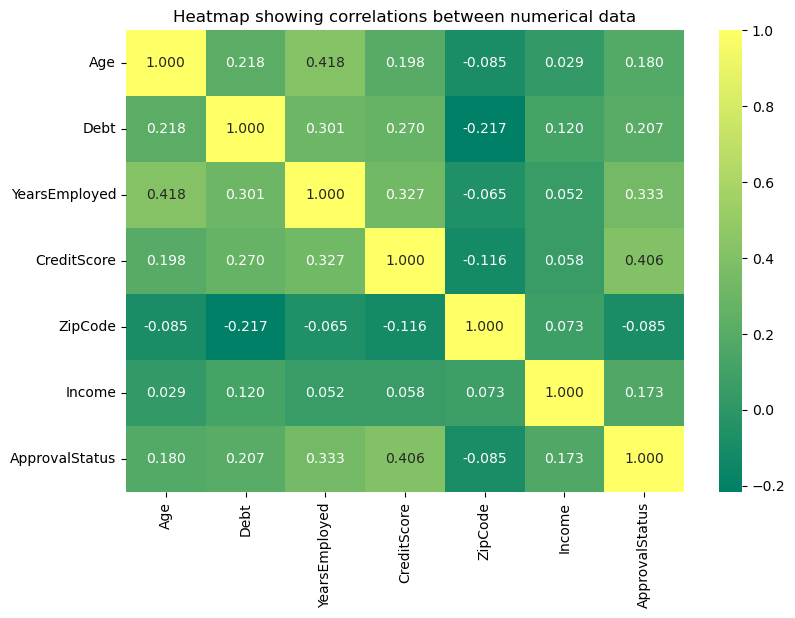

In [23]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [24]:
data_numeric.corr().unstack().sort_values(ascending = False)

Age             Age               1.000000
Debt            Debt              1.000000
Income          Income            1.000000
ZipCode         ZipCode           1.000000
YearsEmployed   YearsEmployed     1.000000
CreditScore     CreditScore       1.000000
ApprovalStatus  ApprovalStatus    1.000000
YearsEmployed   Age               0.417647
Age             YearsEmployed     0.417647
ApprovalStatus  CreditScore       0.406052
CreditScore     ApprovalStatus    0.406052
ApprovalStatus  YearsEmployed     0.332728
YearsEmployed   ApprovalStatus    0.332728
                CreditScore       0.327325
CreditScore     YearsEmployed     0.327325
YearsEmployed   Debt              0.300600
Debt            YearsEmployed     0.300600
                CreditScore       0.269834
CreditScore     Debt              0.269834
Debt            Age               0.217681
Age             Debt              0.217681
Debt            ApprovalStatus    0.207086
ApprovalStatus  Debt              0.207086
Age        

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


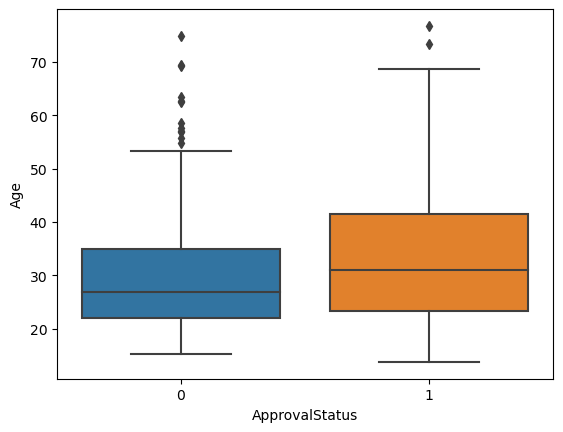

In [25]:
sns.boxplot(data = data_numeric , x = 'ApprovalStatus' , y = 'Age')
plt.show()

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


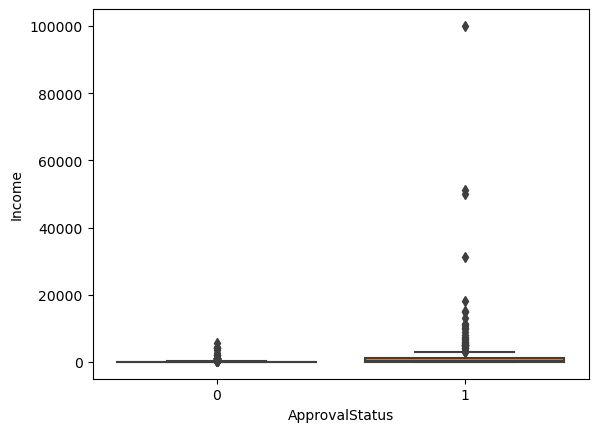

In [26]:
sns.boxplot(data = data_numeric , x = 'ApprovalStatus' , y = 'Income')
plt.show()

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


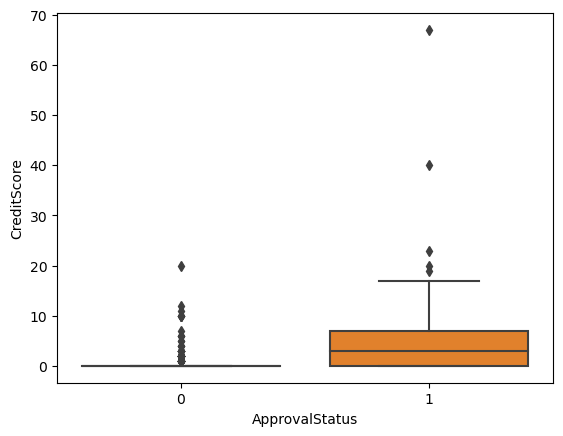

In [27]:
sns.boxplot(data = data_numeric , x = 'ApprovalStatus' , y = 'CreditScore')
plt.show()

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


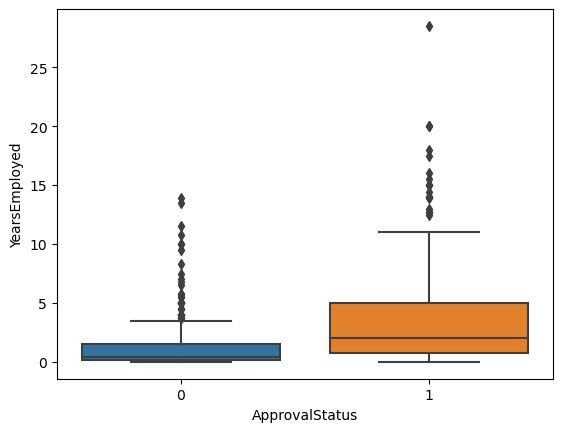

In [28]:
sns.boxplot(data = data_numeric , x = 'ApprovalStatus' , y = 'YearsEmployed')
plt.show()

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

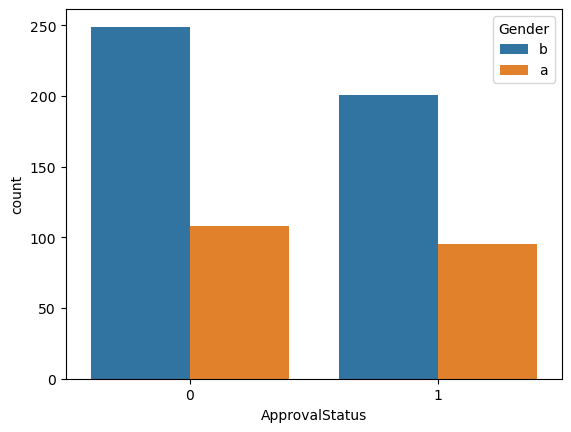

In [31]:
sns.countplot(data = data_df_clean , x = 'ApprovalStatus' ,  hue= 'Gender')
plt.show()

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

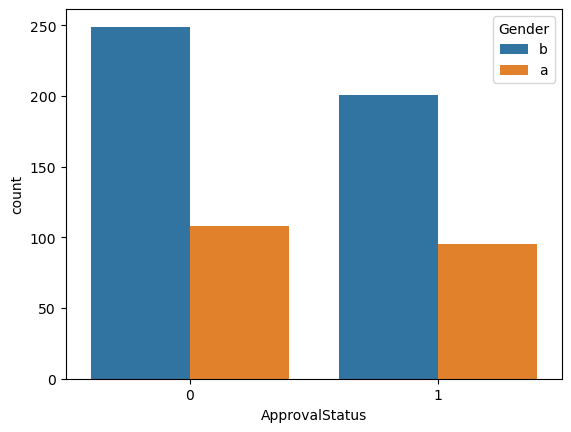

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

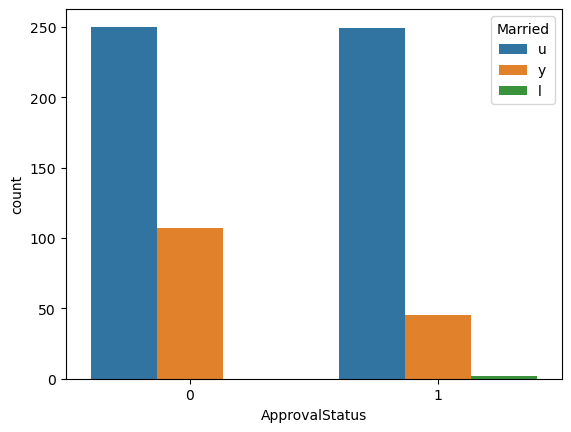

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

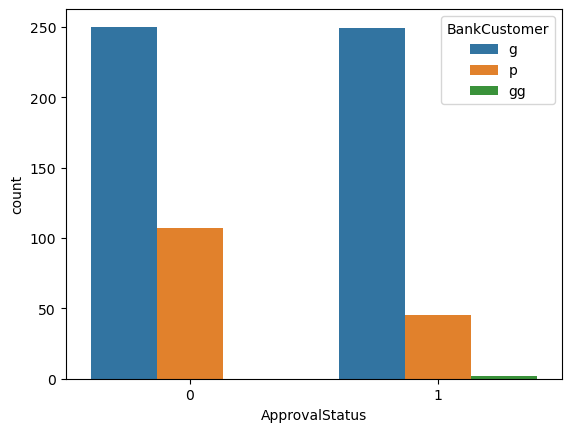

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

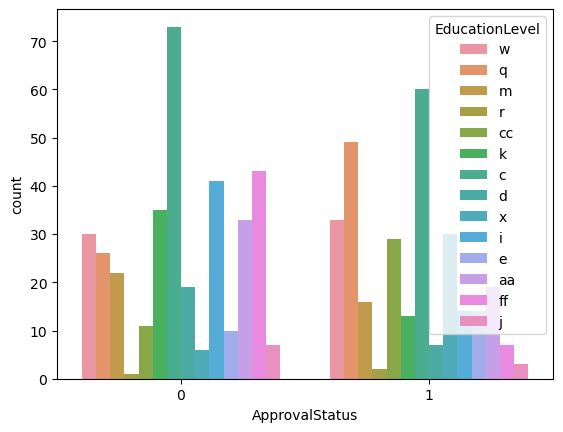

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

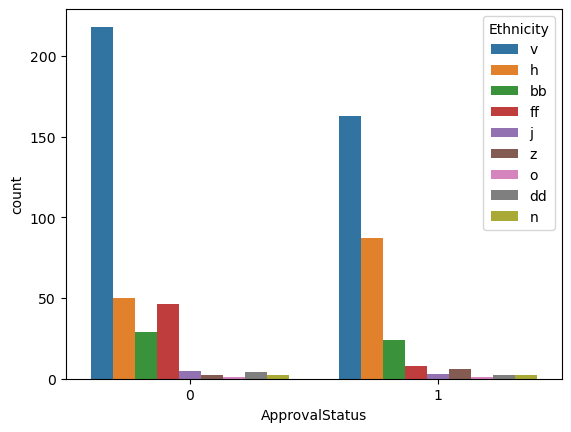

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

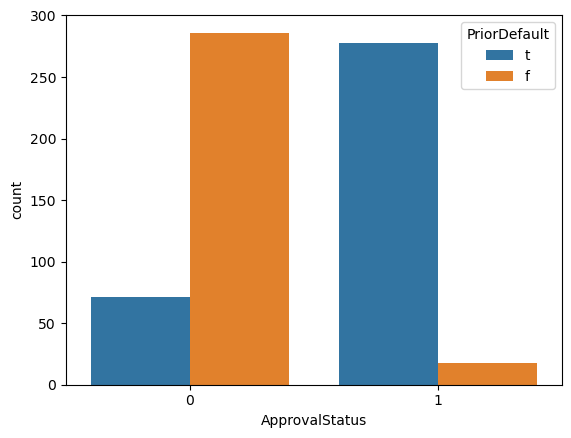

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

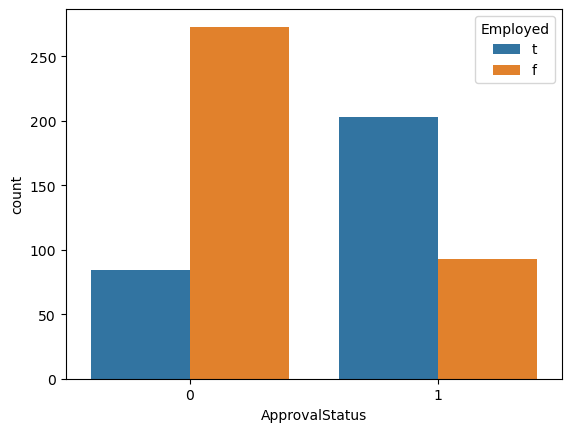

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

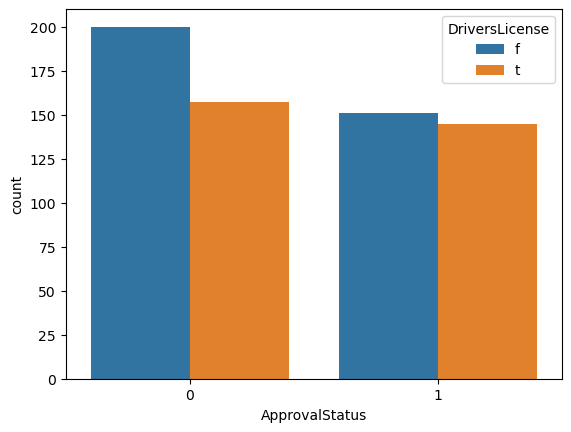

/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/avinashshruthi/miniforge3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

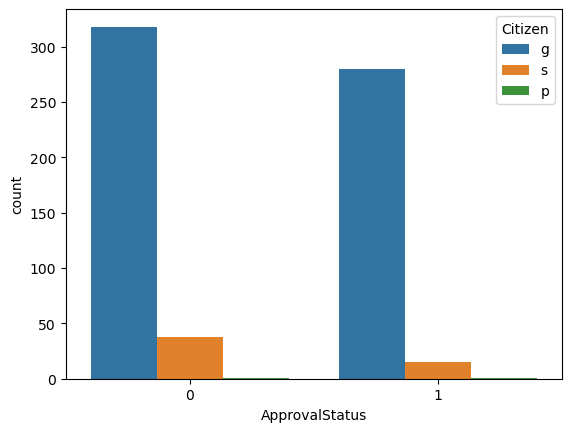

In [34]:
Cat_cols = ['Gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen']

for col in Cat_cols:
   sns.countplot(data = data_df_clean , x = 'ApprovalStatus' ,  hue= col)
   plt.show()

In [35]:
### Dataset for Model Development
from sklearn.model_selection import train_test_split


df_full_train, df_test = train_test_split(data_df_clean, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.ApprovalStatus.values
y_val = df_val.ApprovalStatus.values
y_test = df_test.ApprovalStatus.values

del df_train['ApprovalStatus']
del df_val['ApprovalStatus']
del df_test['ApprovalStatus']

In [36]:
data_numeric.columns

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'ApprovalStatus'],
      dtype='object')

In [48]:
## Feature importance using ROCAUC 
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, f1_score

In [37]:

numeric_cols = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']

for c in numeric_cols:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%16s, %.3f' % (c, auc))

             Age, 0.606
            Debt, 0.622
   YearsEmployed, 0.722
     CreditScore, 0.762
         ZipCode, 0.559
          Income, 0.628


Training the Model

In [38]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [39]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [40]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [45]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [46]:
roc_auc_score(y_val, y_pred)

0.9336178283546704

In [ ]:
y_pred = 0 if x > 0.5 then 1

In [51]:
print("Linear Regresion Baseline Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Linear Regresion Baseline Model Scores
Roc Auc Score: 0.9336178283546704
Precision: 0.8032786885245902
Recall: 0.8596491228070176
F1 Score 0.8305084745762712
Confusion Matrix: [[62 12]
 [ 8 49]]


## Exploring Decision Tree Classifier

In [54]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]

In [55]:
print("Decision Tree Baseline Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Decision Tree Baseline Model Scores
Roc Auc Score: 0.8021574205784732
Precision: 0.7540983606557377
Recall: 0.8070175438596491
F1 Score 0.7796610169491526
Confusion Matrix: [[59 15]
 [11 46]]


## Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

In [56]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.899
   2 -> 0.884
   3 -> 0.893
   4 -> 0.891
   5 -> 0.881
   6 -> 0.875
  10 -> 0.815
  15 -> 0.813
  20 -> 0.835
None -> 0.793


In [57]:
scores = []

for depth in [3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [58]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [59]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             3      4      5
min_samples_leaf                     
1                 0.893  0.878  0.896
5                 0.947  0.937  0.929
10                0.947  0.942  0.956
15                0.947  0.956  0.963
20                0.947  0.956  0.963
100               0.931  0.931  0.931
200               0.500  0.500  0.500
500               0.500  0.500  0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

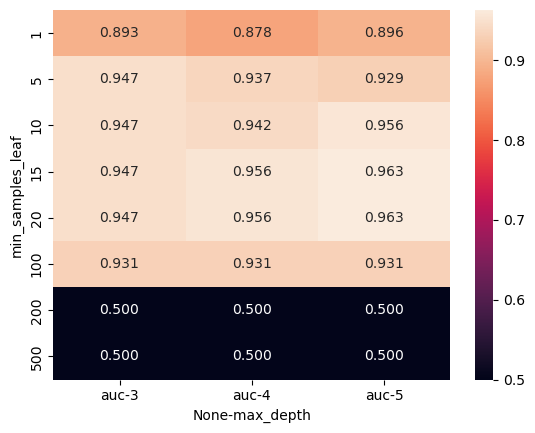

In [60]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [61]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)

In [65]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

In [63]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- PriorDefault=f <= 0.50
|   |--- CreditScore <= 3.50
|   |   |--- Income <= 525.50
|   |   |   |--- BankCustomer=p <= 0.50
|   |   |   |   |--- ZipCode <= 125.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ZipCode >  125.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- BankCustomer=p >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Income >  525.50
|   |   |   |--- class: 1
|   |--- CreditScore >  3.50
|   |   |--- ZipCode <= 75.00
|   |   |   |--- class: 1
|   |   |--- ZipCode >  75.00
|   |   |   |--- ZipCode <= 214.00
|   |   |   |   |--- class: 1
|   |   |   |--- ZipCode >  214.00
|   |   |   |   |--- class: 1
|--- PriorDefault=f >  0.50
|   |--- Debt <= 0.39
|   |   |--- class: 0
|   |--- Debt >  0.39
|   |   |--- YearsEmployed <= 2.12
|   |   |   |--- ZipCode <= 304.50
|   |   |   |   |--- class: 0
|   |   |   |--- ZipCode >  304.50
|   |   |   |   |--- class: 0
|   |   |--- YearsEmployed >  2.12
|   |   |   |--- class: 0



In [66]:
print("Decision Tree Best Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Decision Tree Best Model Scores
Roc Auc Score: 0.9628971076339498
Precision: 0.847457627118644
Recall: 0.8771929824561403
F1 Score 0.8620689655172413
Confusion Matrix: [[65  9]
 [ 7 50]]


## Exploring Random Forest Classifier

In [67]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

In [68]:
print("Random Forest Baseline Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Decision Tree Baseline Model Scores
Roc Auc Score: 0.94357515410147
Precision: 0.819672131147541
Recall: 0.8771929824561403
F1 Score 0.8474576271186439
Confusion Matrix: [[63 11]
 [ 7 50]]


In [69]:
## n_estimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [70]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [71]:
df_scores

,n_estimators,auc
0,10,0.924964
1,20,0.929113
2,30,0.936581
3,40,0.942034
4,50,0.941679
5,60,0.940493
6,70,0.941679
7,80,0.942271
8,90,0.941797
9,100,0.943575


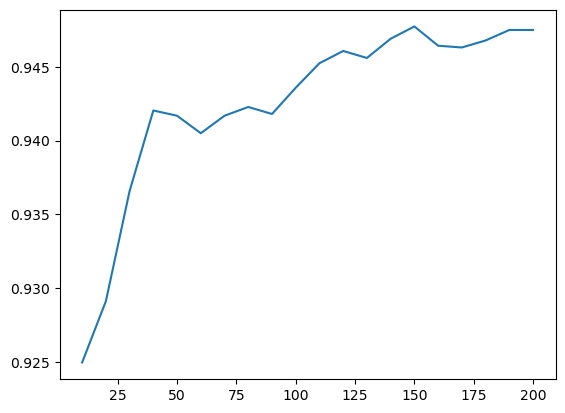

In [72]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [73]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [74]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

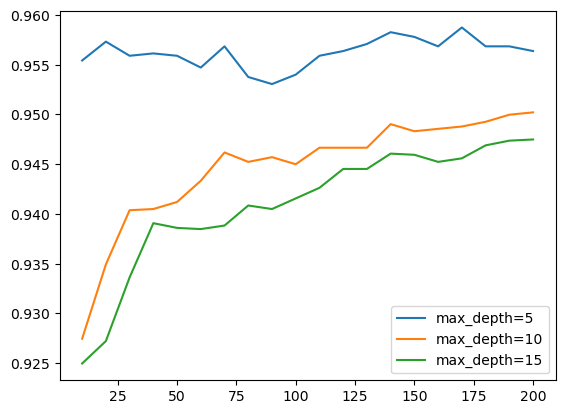

In [75]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [76]:
max_depth = 5

In [77]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [78]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

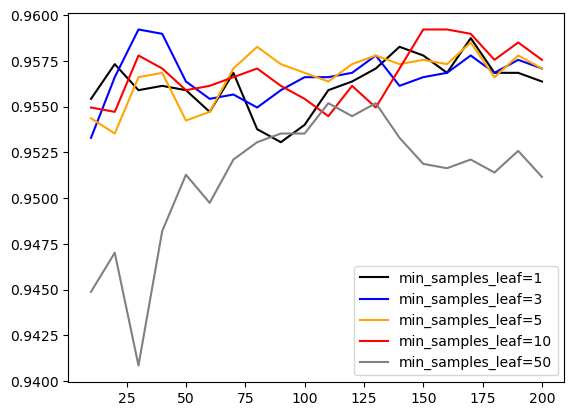

In [79]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [83]:
min_samples_leaf = 10

In [84]:
rf = RandomForestClassifier(n_estimators=150,
                            max_depth=5,
                            min_samples_leaf=10,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=150,
                       random_state=1)

In [85]:
y_pred = rf.predict_proba(X_val)[:, 1]

print("Random Foerst Best Model Scores")
print("Roc Auc Score:", roc_auc_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred >= 0.5))
print("Recall:",recall_score(y_val, y_pred >= 0.5))
print("F1 Score", f1_score(y_val, y_pred >= 0.5))
print("Confusion Matrix:" ,confusion_matrix(y_val, y_pred >= 0.5))

Random Foerst Best Model Scores
Roc Auc Score: 0.9592223802750118
Precision: 0.8181818181818182
Recall: 0.9473684210526315
F1 Score 0.8780487804878049
Confusion Matrix: [[62 12]
 [ 3 54]]


In [86]:
rf.feature_importances_

array([2.31592470e-02, 2.98097491e-03, 0.00000000e+00, 5.02048950e-03,
       8.80467639e-04, 0.00000000e+00, 2.68225481e-04, 8.30763753e-02,
       3.42728530e-02, 2.08300315e-03, 2.88186071e-03, 4.30955148e-04,
       1.23460188e-03, 1.11601985e-03, 0.00000000e+00, 0.00000000e+00,
       6.16793331e-03, 4.84379091e-03, 0.00000000e+00, 1.73701693e-03,
       3.39027094e-04, 2.25173609e-03, 0.00000000e+00, 1.55265111e-03,
       6.31447077e-03, 6.12324177e-02, 6.05237164e-02, 5.19623081e-04,
       0.00000000e+00, 1.81474110e-03, 5.60499532e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.51979277e-03, 0.00000000e+00,
       1.97701604e-03, 1.31857727e-03, 4.48555590e-02, 0.00000000e+00,
       6.68428300e-03, 5.38685250e-03, 2.50541221e-01, 2.76676928e-01,
       6.83671938e-02, 3.13653833e-02])

In [87]:
features = dv.get_feature_names_out()

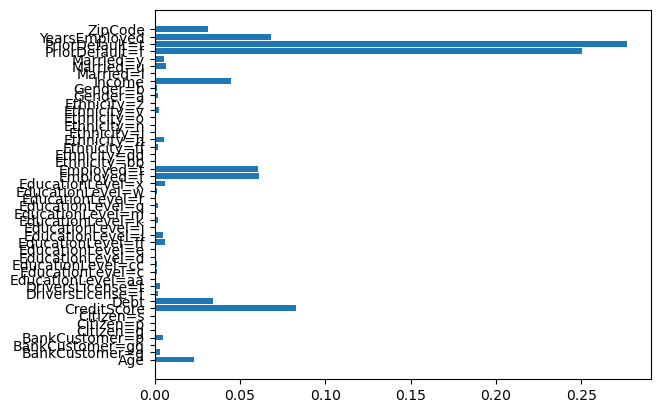

In [90]:
plt.barh(features, rf.feature_importances_)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

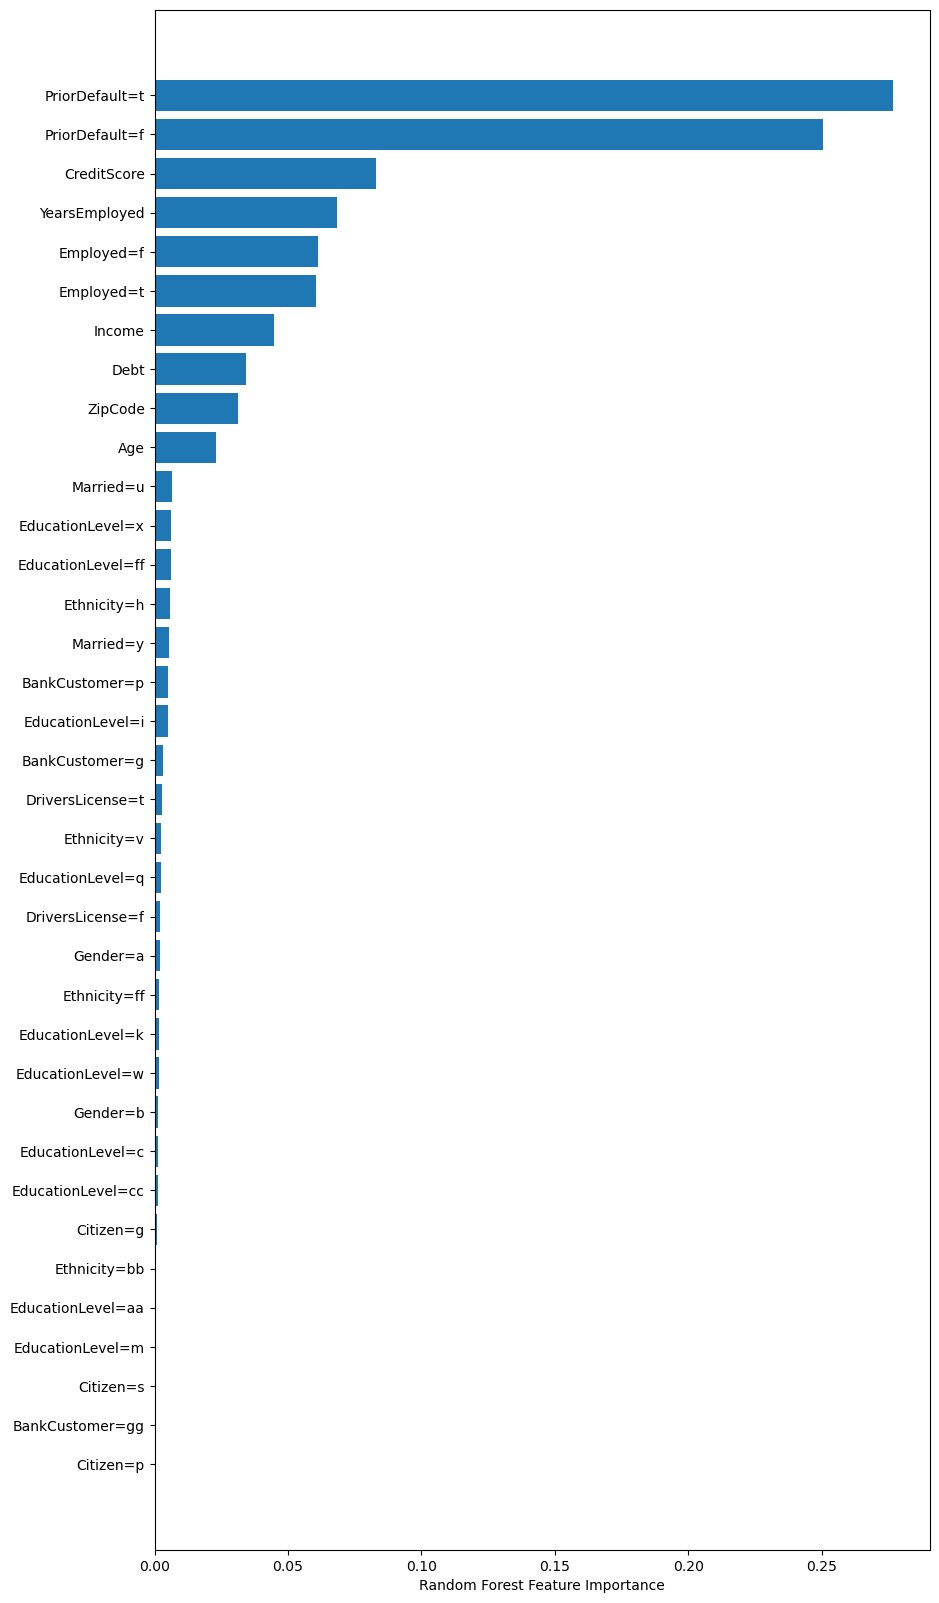

In [98]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx][10:], rf.feature_importances_[sorted_idx][10:])
plt.xlabel("Random Forest Feature Importance")

## Exploring XGBoost

In [100]:
# features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [101]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [102]:
y_pred = model.predict(dval)

In [103]:
roc_auc_score(y_val, y_pred)

0.954954954954955

In [104]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [105]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [106]:
s = output.stdout

In [108]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [109]:
df_score = parse_xgb_output(output)

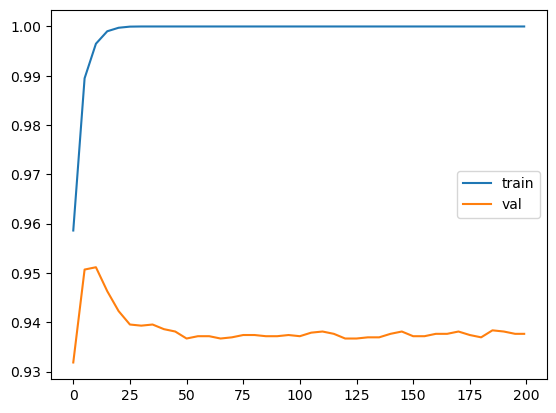

In [110]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

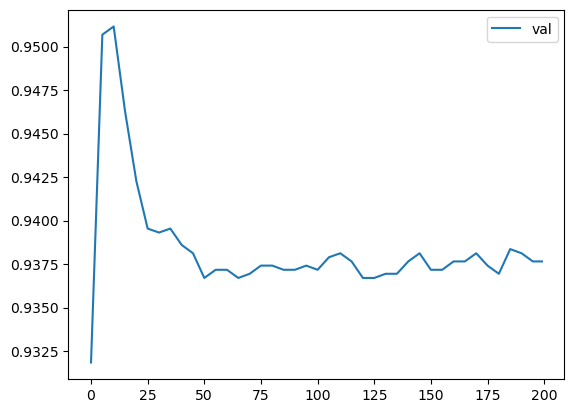

In [111]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## XGBoost parameter tuning

Tuning the following parameters:

* `eta`
* `max_depth`
* `min_child_weight`

In [ ]:
scores = {}

In [124]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [125]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

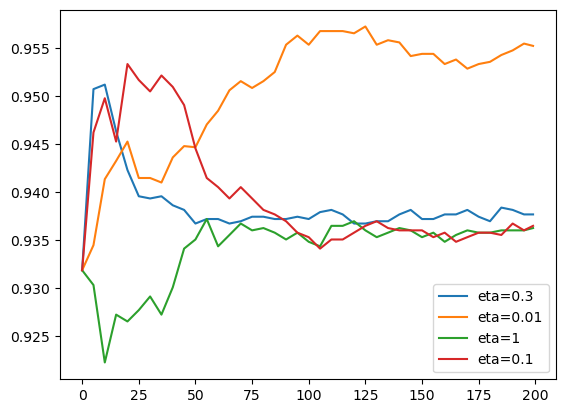

In [126]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

# plt.ylim(0.8, 0.84)
plt.legend()

In [ ]:
# eta = 0.01

In [132]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [128]:
scores = {}

In [133]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

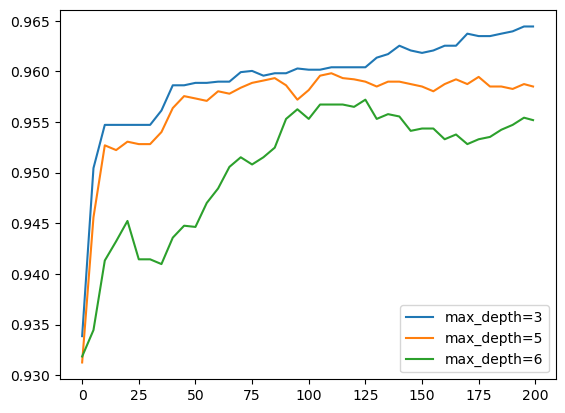

In [134]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

# plt.ylim(0.8, 0.84)
plt.legend()

In [142]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [137]:
scores = {}

In [143]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

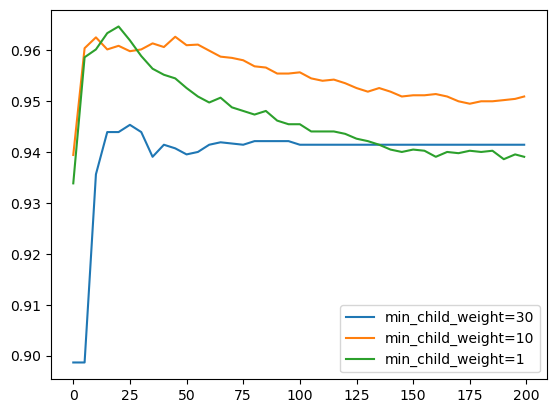

In [144]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

# plt.ylim(0.82, 0.84)
plt.legend()

In [145]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## Selecting the Final Model

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model
* selecting best model based on F1-SCORE

In [146]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)

In [147]:
y_pred = dt.predict_proba(X_val)[:, 1]
f1_score(y_val, y_pred >= 0.5)

0.8620689655172413

In [148]:
rf = RandomForestClassifier(n_estimators=150,
                            max_depth=5,
                            min_samples_leaf=10,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=150,
                       random_state=1)

In [150]:
y_pred = rf.predict_proba(X_val)[:, 1]
f1_score(y_val, y_pred >= 0.5)

0.8780487804878049

In [151]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [152]:
y_pred = model.predict(dval)
f1_score(y_val, y_pred >= 0.5)

0.8837209302325582

XGboost hyperparameter tuned has the best F1 score of 0.88 on validation set. choosing it to run on full training dataset and checking performance on test set

In [153]:
df_full_train = df_full_train.reset_index(drop=True)

In [154]:
del df_full_train['ApprovalStatus']

In [155]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [158]:
feature_names=dv.get_feature_names_out()

In [160]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_train,
                    )
dtest = xgb.DMatrix(X_test,label=y_test)

In [161]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [162]:
y_pred = model.predict(dtest)

In [166]:
f1_score(y_test, y_pred>=0.6)

0.8521739130434782

Saving the Xgboost Model

In [167]:
import pickle

In [170]:
eta = 0.01

In [171]:
output_file = f'model_eta={eta}.bin'

In [172]:
output_file

'model_eta=0.01.bin'

In [173]:
f_out = open(output_file, 'wb') 
pickle.dump((dv, model), f_out)
f_out.close()

In [174]:
!ls -lh *.bin

-rw-r--r--@ 1 avinashshruthi  staff   169K Nov  5 01:18 model_eta=0.01.bin
